### Student Activity: Portfolio Planner Part I

This program is part 1 of a two-part student activity and begins the following:

`PART 1: Portfolio Optimization via Risk Evaluation`

Reads in the CSV datasets of 10 stocks, calculates the volatility of each stock, drops the top-five highly volatile stocks, sets allocations for the remaining stocks based on risk/volatility, and calculates the returns of a hypothetical `$10,000` investment for the constructed portfolio.

`PART 2: Portfolio Optimization via Correlation and Return-to-Risk (Sharpe Ratio) Evaluations`

To be continued in the second part!


In [1]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

### Read CSVs as DataFrames 

In [2]:
# Set the file paths
bk_data = Path("bk_data.csv")
fang_data = Path("fang_data.csv")
jnj_data = Path("jnj_data.csv")
luv_data = Path("luv_data.csv")
mu_data = Path("mu_data.csv")
nke_data = Path("nke_data.csv")
sbux_data = Path("sbux_data.csv")
t_data = Path("t_data.csv")
wdc_data = Path("wdc_data.csv")
wrk_data = Path("wrk_data.csv")

# Read the CSVs and set the `date` column as a datetime index to the DataFrame
bk_df = pd.read_csv(bk_data, index_col="date", infer_datetime_format=True, parse_dates=True)
fang_df = pd.read_csv(fang_data, index_col="date", infer_datetime_format=True, parse_dates=True)
jnj_df = pd.read_csv(jnj_data, index_col="date", infer_datetime_format=True, parse_dates=True)
luv_df = pd.read_csv(luv_data, index_col="date", infer_datetime_format=True, parse_dates=True)
mu_df = pd.read_csv(mu_data, index_col="date", infer_datetime_format=True, parse_dates=True)
nke_df = pd.read_csv(nke_data, index_col="date", infer_datetime_format=True, parse_dates=True)
sbux_df = pd.read_csv(sbux_data, index_col="date", infer_datetime_format=True, parse_dates=True)
t_df = pd.read_csv(t_data, index_col="date", infer_datetime_format=True, parse_dates=True)
wdc_df = pd.read_csv(wdc_data, index_col="date", infer_datetime_format=True, parse_dates=True)
wrk_df = pd.read_csv(wrk_data, index_col="date", infer_datetime_format=True, parse_dates=True)

# Display a few rows
wrk_df.head()

/var/folders/wl/x3hxw0v13sb9sgxcqzzdxwlh0000gn/T/ipykernel_5626/3262590508.py:14: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  bk_df = pd.read_csv(bk_data, index_col="date", infer_datetime_format=True, parse_dates=True)
/var/folders/wl/x3hxw0v13sb9sgxcqzzdxwlh0000gn/T/ipykernel_5626/3262590508.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bk_df = pd.read_csv(bk_data, index_col="date", infer_datetime_format=True, parse_dates=True)
/var/folders/wl/x3hxw0v13sb9sgxcqzzdxwlh0000gn/T/ipykernel_5626/3262590508.py:15: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict

,close
date,
2019-05-20,35.15
2019-05-17,36.66
2019-05-16,37.42
2019-05-15,37.44
2019-05-14,37.19


### Combine DataFrames, Sort Index, and Rename Columns

In [3]:
# Create a new pivot table where the columns are the closing prices for each ticker
joined_df = pd.concat([bk_df, fang_df, jnj_df, luv_df, mu_df, nke_df, sbux_df, t_df, wdc_df, wrk_df], axis='columns' ,join='inner')

# Sort datetime index in ascending order (past to present)
joined_df.sort_index(inplace=True)

# * Bank of New York Mellon (BK)
# * Diamondback Energy (FANG)
# * Johnson & Johnson (JNJ)
# * Southwest Airlines Co (LUV)
# * Micron Technologies (MU)
# * Nike (NKE)
# * Starbucks (SBUX)
# * AT&T (T)
# * Western Digital (WDC)
# * Westrock (WRK)
# Set column names
joined_df.columns = ['BK', 'FANG', 'JNJ', 'LUV', 'MU', 'NKE', 'SBUX', 'T', 'WDC', 'WRK']

# Display a few rows
joined_df.head()


,BK,FANG,JNJ,LUV,MU,NKE,SBUX,T,WDC,WRK
date,,,,,,,,,,
2015-06-24,43.29,77.955,99.33,34.35,24.06,53.110,53.710,35.78,87.73,58.5699
2015-06-25,42.85,76.390,99.12,34.49,24.02,52.610,54.070,36.18,85.95,57.2022
2015-06-26,42.98,75.250,99.64,34.32,19.66,54.855,54.620,36.12,84.45,57.2022
2015-06-29,41.79,75.160,97.68,33.18,18.73,53.835,53.550,35.77,81.96,56.1857
2015-06-30,41.97,75.380,97.46,33.09,18.84,54.010,53.615,35.52,78.42,56.2781


### Calculate Daily Returns

In [4]:
# Use the `pct_change` function to calculate daily returns
daily_returns = joined_df.pct_change()
daily_returns.head()

,BK,FANG,JNJ,LUV,MU,NKE,SBUX,T,WDC,WRK
date,,,,,,,,,,
2015-06-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-25,-0.010164,-0.020076,-0.002114,0.004076,-0.001663,-0.009414,0.006703,0.011179,-0.020290,-0.023352
2015-06-26,0.003034,-0.014923,0.005246,-0.004929,-0.181515,0.042672,0.010172,-0.001658,-0.017452,0.000000
2015-06-29,-0.027687,-0.001196,-0.019671,-0.033217,-0.047304,-0.018594,-0.019590,-0.009690,-0.029485,-0.017770
2015-06-30,0.004307,0.002927,-0.002252,-0.002712,0.005873,0.003251,0.001214,-0.006989,-0.043192,0.001645


### Evaluate Riskiness of Stocks

In [5]:
# Use the `std` function and multiply by the square root of the number of trading days in a year to get annualized volatility
annulaized_volatility = daily_returns.std() * np.sqrt(252)
annulaized_volatility

BK      0.225078
FANG    0.370971
JNJ     0.161208
LUV     0.280153
MU      0.479754
NKE     0.245942
SBUX    0.206388
T       0.187571
WDC     0.414714
WRK     0.303048
dtype: float64

### Drop High Volatility Stocks

In [7]:
# Drop the five stocks with the highest volatility in daily returns
annulaized_volatility.sort_values(inplace=True)
# annulaized_volatility
daily_returns.drop(columns=['LUV', 'WRK', 'FANG', 'WDC', 'MU'], inplace=True)
daily_returns

,BK,JNJ,NKE,SBUX,T
date,,,,,
2015-06-24,NaN,NaN,NaN,NaN,NaN
2015-06-25,-0.010164,-0.002114,-0.009414,0.006703,0.011179
2015-06-26,0.003034,0.005246,0.042672,0.010172,-0.001658
2015-06-29,-0.027687,-0.019671,-0.018594,-0.019590,-0.009690
2015-06-30,0.004307,-0.002252,0.003251,0.001214,-0.006989
...,...,...,...,...,...
2019-05-13,-0.019751,-0.013305,-0.016915,-0.022188,-0.004899
2019-05-14,-0.002969,-0.002770,0.013813,0.004956,0.020348
2019-05-15,-0.010636,0.000658,0.004064,0.009084,0.005146


### Set Portfolio Allocations/Weights and Calculate Portfolio Daily Returns

In [8]:
# Set weights for corresponding risk profile of stocks, use the `dot` function to multiply each weight by the corresponding stock daily return
# BK, LUV, NKE, SBUX, T  ... correction BK, JNJ, NKE, SBUX, T
weights =[0.5, 0.2, 0.15, 0.10, 0.05]
portfolio_daily_returns = daily_returns.dot(weights)
portfolio_daily_returns

date
2015-06-24         NaN
2015-06-25   -0.005688
2015-06-26    0.009901
2015-06-29   -0.023010
2015-06-30    0.001963
                ...   
2019-05-13   -0.017537
2019-05-14    0.001546
2019-05-15   -0.003411
2019-05-16    0.004762
2019-05-17   -0.003550
Length: 982, dtype: float64

### Calculate Cumulative Returns

In [9]:
# Use the `cumprod` function to calculate cumulative returns
cumulative_returns = (1+portfolio_daily_returns).cumprod()
cumulative_returns

date
2015-06-24         NaN
2015-06-25    0.994312
2015-06-26    1.004157
2015-06-29    0.981051
2015-06-30    0.982977
                ...   
2019-05-13    1.271370
2019-05-14    1.273336
2019-05-15    1.268993
2019-05-16    1.275035
2019-05-17    1.270509
Length: 982, dtype: float64

### Plot Return of Portfolio Starting with Initial Investment of `$10,000`

<Axes: xlabel='date'>

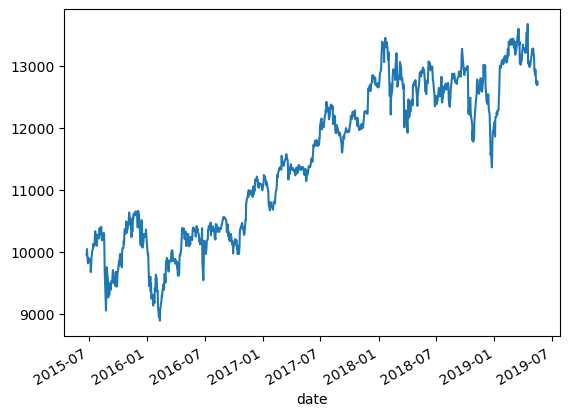

In [10]:
# Plot the returns of the portfolio in terms of money
int_investment = 10000
profits = int_investment*cumulative_returns
profits.plot()